# Multiple linear regression

## Grading the professor

Many college courses conclude by giving students the opportunity to evaluate the course and the instructor anonymously. However, the use of these student evaluations as an indicator of course quality and teaching effectiveness is often criticized because these measures may reflect the influence of non-teaching related characteristics, such as the physical appearance of the instructor. The article titled, "Beauty in the classroom: instructors' pulchritude and putative pedagogical productivity" (Hamermesh and Parker, 2005) found that instructors who are viewed to be better looking receive higher instructional ratings. (Daniel S. Hamermesh, Amy Parker, Beauty in the classroom: instructors pulchritude and putative pedagogical productivity, *Economics of Education Review*, Volume 24, Issue 4, August 2005, Pages 369-376, ISSN 0272-7757, 10.1016/j.econedurev.2004.07.013. http://www.sciencedirect.com/science/article/pii/S0272775704001165.)

In this lab we will analyze the data from this study in order to learn what goes into a positive professor evaluation.

## The data

The data were gathered from end of semester student evaluations for a large sample of professors from the University of Texas at Austin. In addition, six students rated the professors' physical appearance. (This is aslightly modified version of the original data set that was released as part of the replication data for *Data Analysis Using Regression and Multilevel/Hierarchical Models* (Gelman and Hill, 2007).) The result is a data frame where each row contains a different course and columns represent variables about the courses and professors

In [1]:
# for Mac OS users only!
# if you run into any SSL certification issues, 
# you may need to run the following command for a Mac OS installation.
# $/Applications/Python 3.x/Install Certificates.command
#import os, ssl
#if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
#    getattr(ssl, '_create_unverified_context', None)): 
#    ssl._create_default_https_context = ssl._create_unverified_context

import pandas as pd

evals = pd.read_csv('https://www.openintro.org/stat/data/evals.csv')

variable         | description
---------------- | -----------
`score`          | average professor evaluation score: (1) very unsatisfactory - (5) excellent.
`rank`           | rank of professor: teaching, tenure track, tenured.
`ethnicity`      | ethnicity of professor: not minority, minority.
`gender`         | gender of professor: female, male.
`language`       | language of school where professor received education: english or non-english.
`age`            | age of professor.
`cls_perc_eval`  | percent of students in class who completed evaluation.
`cls_did_eval`   | number of students in class who completed evaluation.
`cls_students`   | total number of students in class.
`cls_level`      | class level: lower, upper.
`cls_profs`      | number of professors teaching sections in course in sample: single, multiple.
`cls_credits`    | number of credits of class: one credit (lab, PE, etc.), multi credit.
`bty_f1lower`    | beauty rating of professor from lower level female: (1) lowest - (10) highest.
`bty_f1upper`    | beauty rating of professor from upper level female: (1) lowest - (10) highest.
`bty_f2upper`    | beauty rating of professor from second upper level female: (1) lowest - (10) highest.
`bty_m1lower`    | beauty rating of professor from lower level male: (1) lowest - (10) highest.
`bty_m1upper`    | beauty rating of professor from upper level male: (1) lowest - (10) highest.
`bty_m2upper`    | beauty rating of professor from second upper level male: (1) lowest - (10) highest.
`bty_avg`        | average beauty rating of professor.
`pic_outfit`     | outfit of professor in picture: not formal, formal.
`pic_color`      | color of professor's picture: color, black & white.

## Exploring the data

<div class = 'exercise'>
<h4>Exercise 1</h4>
Is this an observational study or an experiment? The original research question posed in the paper is whether beauty leads directly to the differences in course evaluations. Given the study design, is it possible to answer this question as it is phrased? If not, rephrase the question.
</div>

This is an observational study, since there were no groups of people or buquets created. There could be an association between beauty and course evaluation (if we see for example better feedback to good looking professor, however considering this is observational study, it does not imply causation. We could answer a question like, is there an association between a professor beauty and its course evaluation score?

<div class = 'exercise'>
<h4>Exercise 2</h4>
Describe the distribution of <code>score</code>. Is the distribution skewed? What does that tell you about how students rate courses? Is this what you expected to see? Why, or why not?
</div>

In [2]:
evals.score.plot.hist(bins=12);

In [5]:
evals.score.describe()

count    463.000000
mean       4.174730
std        0.543865
min        2.300000
25%        3.800000
50%        4.300000
75%        4.600000
max        5.000000
Name: score, dtype: float64

The distribution is skewed to the left. It has a mean of 4.17 and a standard deviation of 0.54 meaning the majority of students were likely to provide a score of at least around 3.5 out of 5.0, suggesting that they enjoyed taking the courses. I was expecting a distribution likely to be normal with similar number of scores to the left than to the right of the mean.

<div class = 'exercise'>
<h4>Exercise 3</h4>
    Excluding <code>score</code>, select two other variables and describe their relationship using an appropriate visualization (scatterplot, side-by-side boxplots, or mosaic plot).
</div>

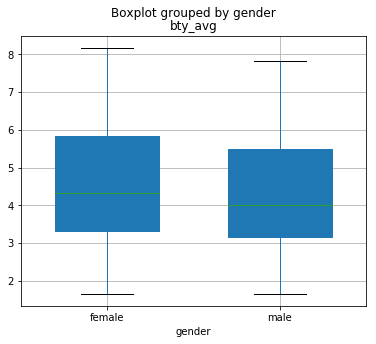

In [6]:
# boxplot of gender of the professor and its average beauty rating
evals.boxplot(column='bty_avg', by='gender', widths = 0.6,patch_artist = True,figsize=(6,5));

The boxplot shows that the distribution is similar in both sex, meaning female professor are getting similar average beauty rating, with ranges from 2 up to around 8.

## Simple linear regression

The fundamental phenomenon suggested by the study is that better looking teachers are evaluated more favorably. Let's create a scatterplot to see if this appears to be the case:

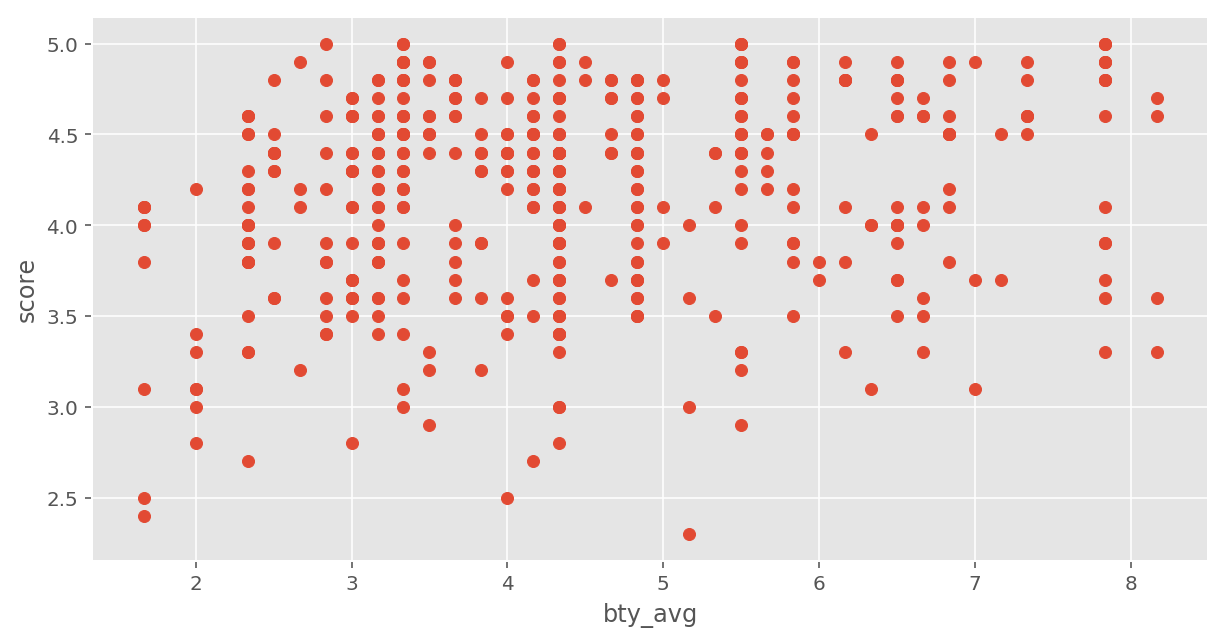

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)

plt.scatter(evals.bty_avg, evals.score)
plt.xlabel('bty_avg')
plt.ylabel('score')
plt.show();

Before we draw conclusions about the trend, compare the number of observations in the data frame with the approximate number of points on the scatterplot. Is anything awry?

In [8]:
# chequing the number of observations
evals.shape

(463, 21)

At first look to the scatter plot, there seem to be less than 463 dots plotted.

<div class = 'exercise'>
<h4>Exercise 4</h4>
Replot the scatterplot, but this time add jitter on the y- or the x-coordinate. What was misleading about the initial scatterplot?
</div>

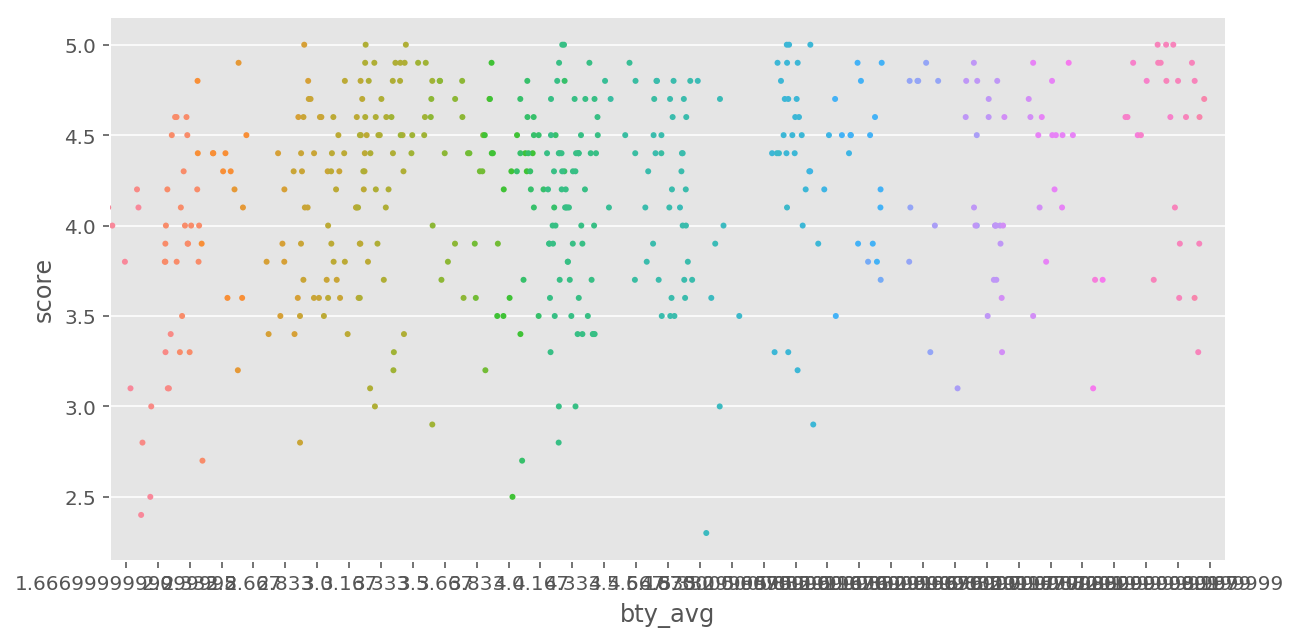

In [10]:
# A scatterplot with jitter
import seaborn as sns
sns.stripplot(evals.bty_avg, evals.score, jitter=0.8, size=3)

The initial scatter plot did not show overlaping observations, we can see much more dots in this new plot.

<div class = 'exercise'>
<h4>Exercise 5</h4>
Let's see if the apparent trend in the plot is something more than natural variation. Fit a linear model called <code>m_bty</code> to predict average professor score by average beauty rating and add the line to your plot. Write out the equation for the linear model and interpret the slope. Is average beauty score a statistically significant predictor? Does it appear to be a practically significant predictor?
</div>

In [12]:
import statsmodels.api as sm

formula_string = "score ~ bty_avg"

model = sm.formula.ols(formula = formula_string, data = evals)
model_fitted = model.fit()
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     16.73
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           5.08e-05
Time:                        11:35:52   Log-Likelihood:                -366.22
No. Observations:                 463   AIC:                             736.4
Df Residuals:                     461   BIC:                             744.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8803      0.076     50.961      0.0

In [13]:
print('Intercept =', model_fitted.params[0])
print('Slope =', model_fitted.params[1])

Intercept = 3.880337954607726
Slope = 0.06663703701981438


Knowing the intercept and slope, we can write down the least squares regression line for the linear model:

#### ${y}$ = 3.8803 + 0.0666 x (bty_avg)

Slope meaning: for 1 count increase in bty_avg variable the professor score ingreases 0.0666.

Considering the R-squared value is really small (0.035) then average beauty is not a statistically significant predictor for score.

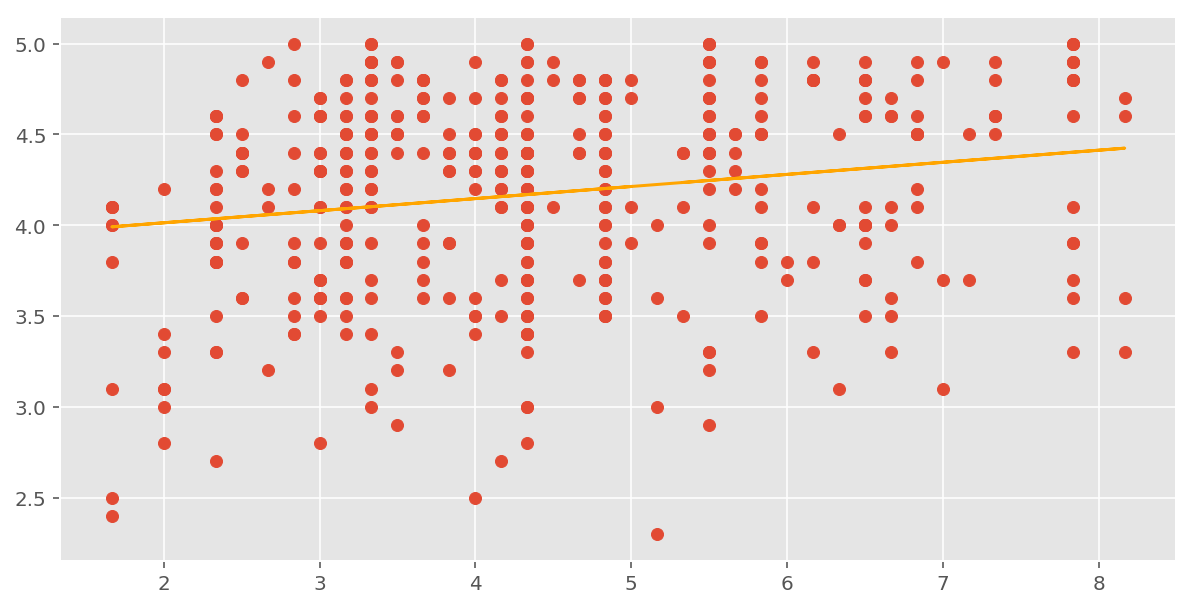

In [14]:
x = evals['bty_avg']
y = evals['score']

y_pred = model_fitted.predict(x)

plt.scatter(evals['bty_avg'], evals['score'])
plt.plot(x, y_pred, color = 'orange')
plt.show();

<div class = 'exercise'>
<h4>Exercise 6</h4>
Use residual plots to evaluate whether the conditions of least squares regression are reasonable. Provide plots and comments for each one (see the Simple Regression Lab for a reminder of how to make these).
</div>

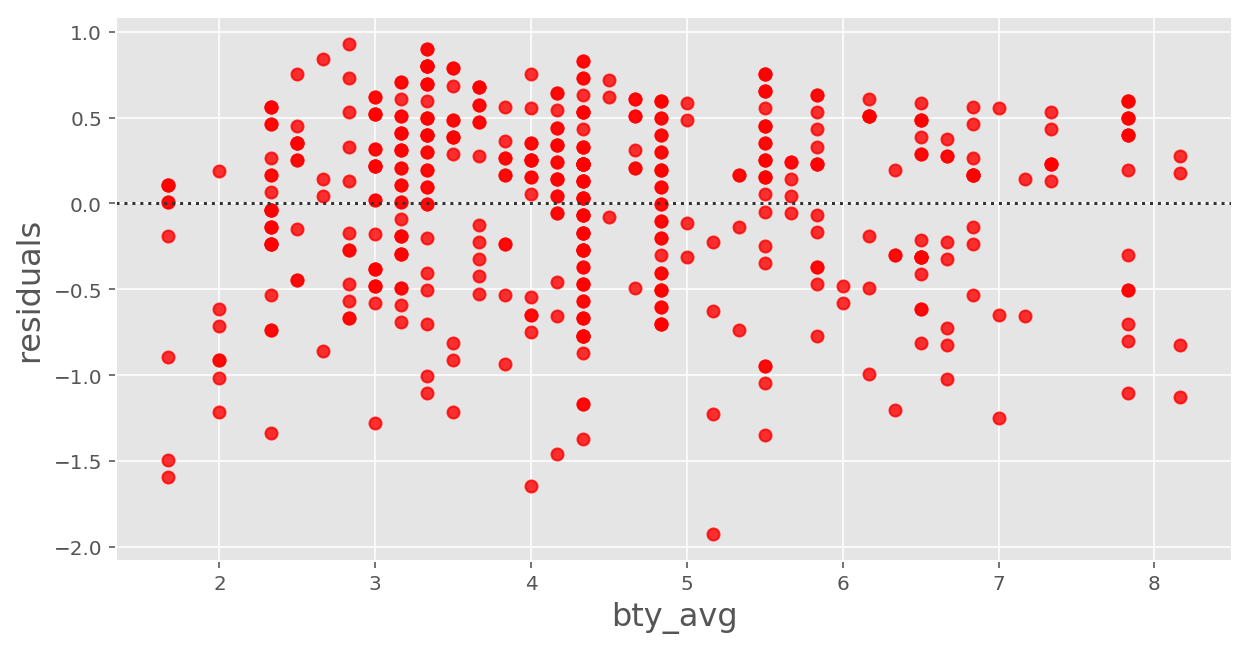

In [15]:
sns.residplot(x, y, color = 'red')
plt.xlabel('bty_avg', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)
plt.show();

We can see that there is not a clear pattern in the residual plot, sugesting that there is a linear relationship between the 2 variables.


*Nearly normal residuals*: To check this condition, we can look at a histogram.

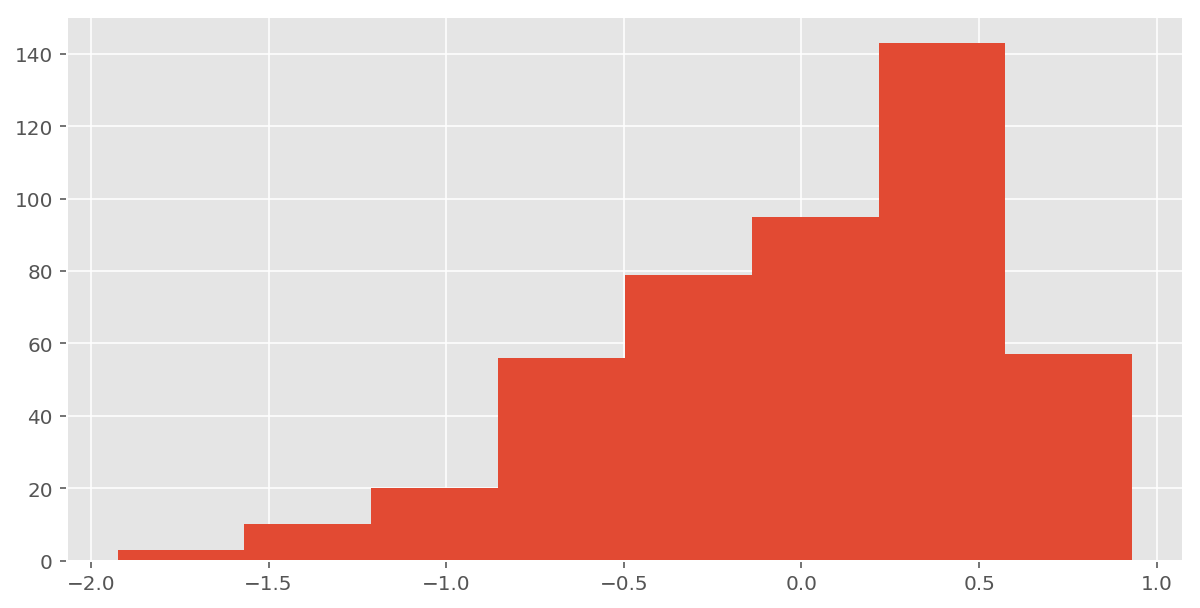

In [16]:
residuals = (y - y_pred)
plt.hist(residuals, bins = 8)
plt.show();

or a normal probability plot of the residuals.

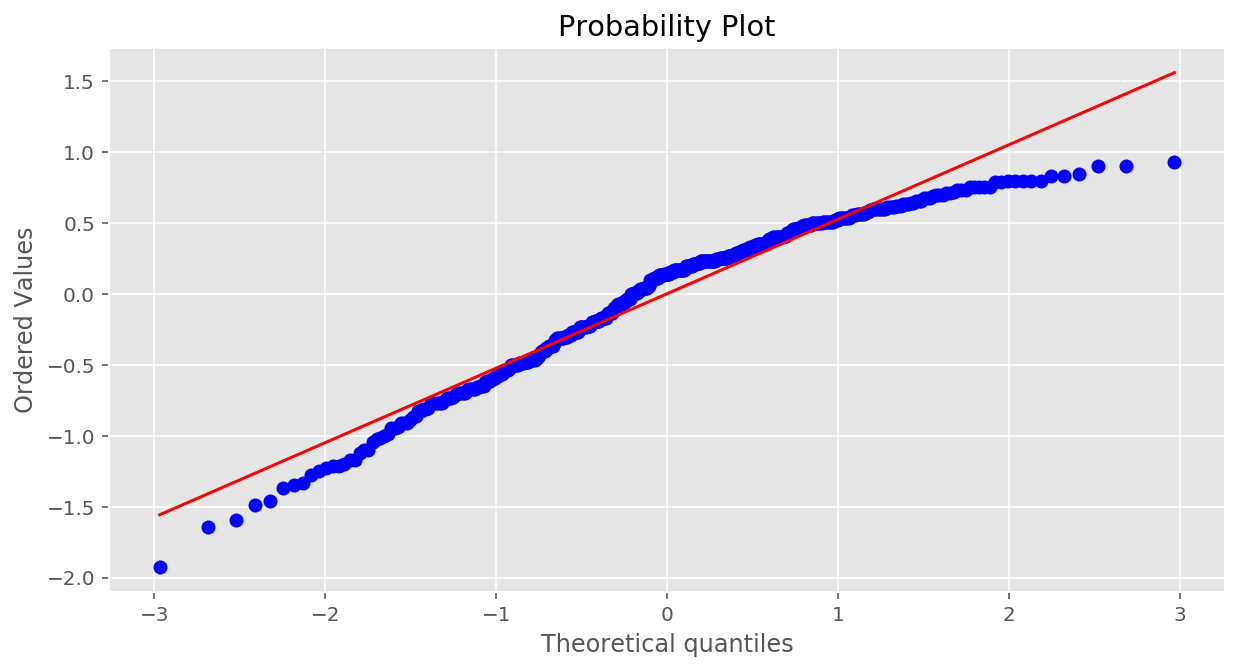

In [17]:
from scipy.stats import probplot
probplot(residuals, plot = plt)
plt.show(); 

The histogram shows a left skewed, but considering the histogram along with the normal probability plot the residuals can still be considered to be nearly normal.
Independence can also be assumed.

## Multiple linear regression

The data set contains several variables on the beauty score of the professor: individual ratings from each of the six students who were asked to score the physical appearance of the professors and the average of these six scores. Let's take a look at the relationship between one of these scores and the average beauty score.

In [19]:
evals.head(1)

,score,rank,ethnicity,gender,language,age,cls_perc_eval,cls_did_eval,cls_students,cls_level,...,cls_credits,bty_f1lower,bty_f1upper,bty_f2upper,bty_m1lower,bty_m1upper,bty_m2upper,bty_avg,pic_outfit,pic_color
0,4.7,tenure track,minority,female,english,36,55.81395,24,43,upper,...,multi credit,5,7,6,2,4,6,5.0,not formal,color


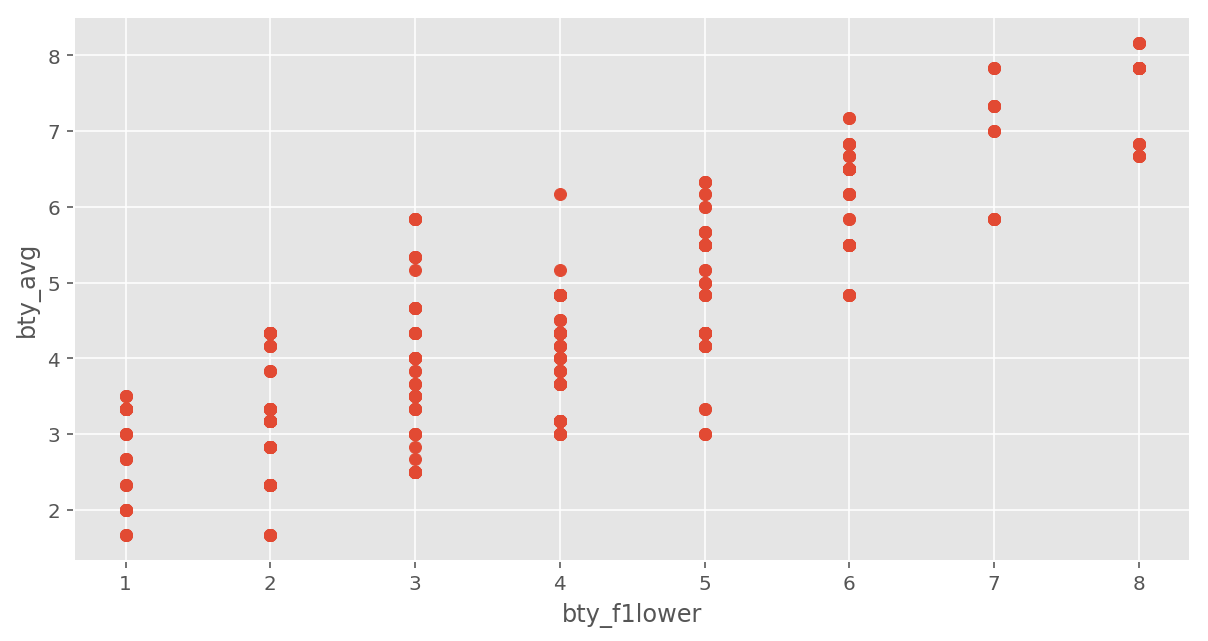

In [18]:
plt.scatter(evals.bty_f1lower, evals.bty_avg)
plt.xlabel('bty_f1lower')
plt.ylabel('bty_avg')
plt.show();

In [108]:
evals.bty_avg.corr(evals.bty_f1lower)

0.8439111692147886

As expected the relationship is quite strong - after all, the average score is calculated using the individual scores. We can actually take a look at the relationships between all beauty variables (columns 13 through 19) by plotting pairwise relationships using `pairplot()` function by `seaborn`:

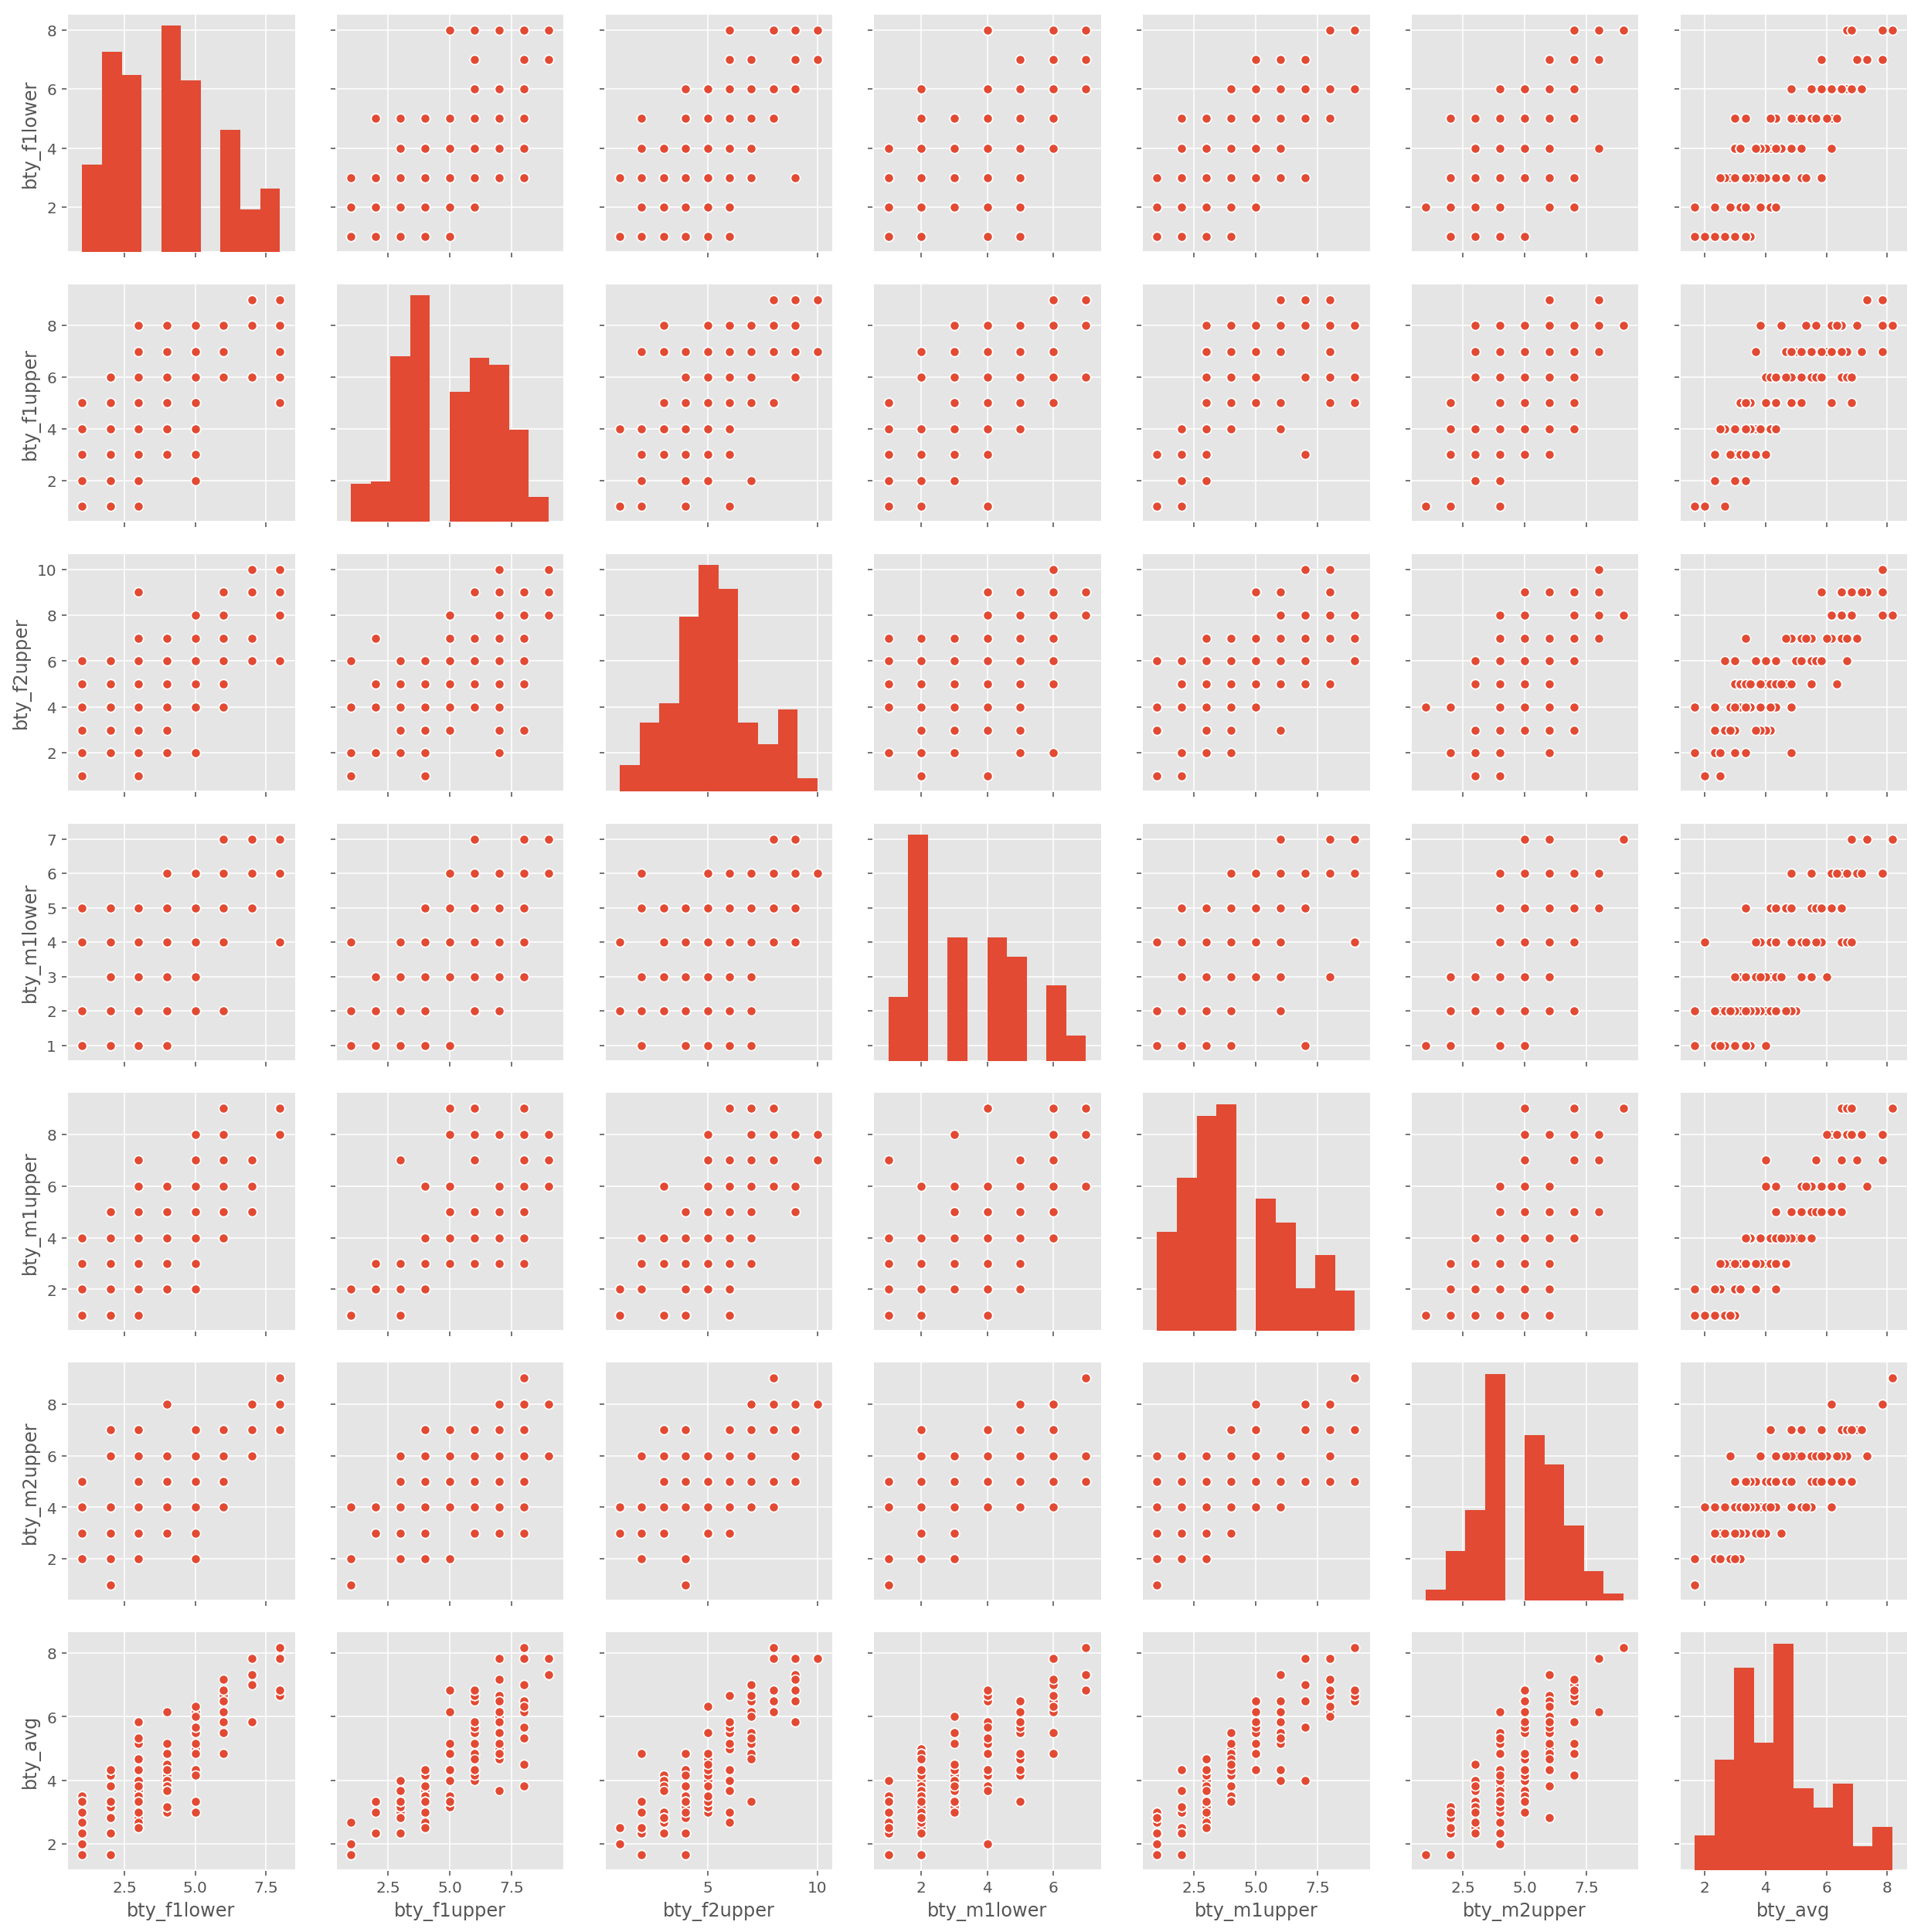

In [109]:
import seaborn as sns

sns.pairplot(evals.iloc[:,12:19])
plt.show();

These variables are collinear (correlated), and adding more than one of these variables to the model would not add much value to the model. In this application and with these highly-correlated predictors, it is reasonable to use the average beauty score as the single representative of these variables.

In order to see if beauty is still a significant predictor of professor score after we've accounted for the gender of the professor, we can add the gender term into the model.

Since `gender` is a nominal category feature, we first need to convert `gender` from having the values of `female` and `male` to being an indicator variable called `gender_integer` that takes a value of `0` for females and a value of `1` for males (Such variables are often referred to as "dummy" variables.). We can use the `replace()` function for integer-encoding. Before using the `replace()` function, we need define a mapping between the levels and the integers using a dictionary as below.

In [20]:
level_mapping = {'female': 0, 'male': 1}

Once we define a mapping, we can define a new variable called `gender_integer` and then perform the integer-encoding using the `replace()` function.

In [21]:
gender_integer = evals['gender'].copy()
gender_integer = gender_integer.replace(level_mapping)
gender_integer.head(5)
evals['gender_integer'] = gender_integer

In [22]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

x = evals[['bty_avg','gender_integer']].copy()
y = np.array(evals.score).reshape((-1, 1))

# model initialization
mlinear_model = LinearRegression()
# fit the data
mlinear_model.fit(x, y)
# predict
y_pred = mlinear_model.predict(x)
print('Slope:', mlinear_model.coef_)
print('Intercept:', mlinear_model.intercept_)
print('R-squared:', r2_score(y, y_pred))

Slope: [[0.07415537 0.17238955]]
Intercept: [3.74733824]
R-squared: 0.059122790336817665


<div class = 'exercise'>
<h4>Exercise 7</h4>
P-values and parameter estimates should only be trusted if the conditions for the regression are reasonable. Verify that the conditions for this model are reasonable using diagnostic plots.
</div>

<div class = 'exercise'>
<h4>Exercise 8</h4>
    Is <code>bty_avg</code> still a significant predictor of <code>score</code>? Has the addition of <code>gender</code> to the model changed the parameter estimate for <code>bty_avg</code>?
</div>

In [113]:
import statsmodels.formula.api as smf
reg = smf.ols('score ~ bty_avg + gender_integer', data=evals).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     14.45
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           8.18e-07
Time:                        21:49:55   Log-Likelihood:                -360.37
No. Observations:                 463   AIC:                             726.7
Df Residuals:                     460   BIC:                             739.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7473      0.085     44.266      0.000       3.581       3.914
bty_avg            0.0742      0.016      4.563      0.000       0.042       0.106
gender_integer     0.1724      0.050      3.433      0.001       0.074       0.271
==============================================================================
Omnibus:                       30.145   Durbin-Watson:                   1.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.960
Skew:                          -0.672   Prob(JB):                     2.56e-08
Kurtosis:                       2.925   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

bty_avg is still a signifficant predictor and the addition of gender has increased the R-squared from 0.035 to 0.059.

As a result, for females, the parameter estimate is multiplied by zero, leaving the intercept and slope form familiar from simple regression.

#### ${\hat{score}}$ = ${\hat{\beta}}$<sub>0</sub> + ${\hat{\beta}}$<sub>1</sub> ${*}$ *bty_avg* + ${\hat{\beta}}$<sub>2</sub> ${*}$ (0) = ${\hat{\beta}}$<sub>0</sub> + ${\hat{\beta}}$<sub>1</sub> ${*}$ *bty_avg*

We can plot two lines corresponding to males and females.

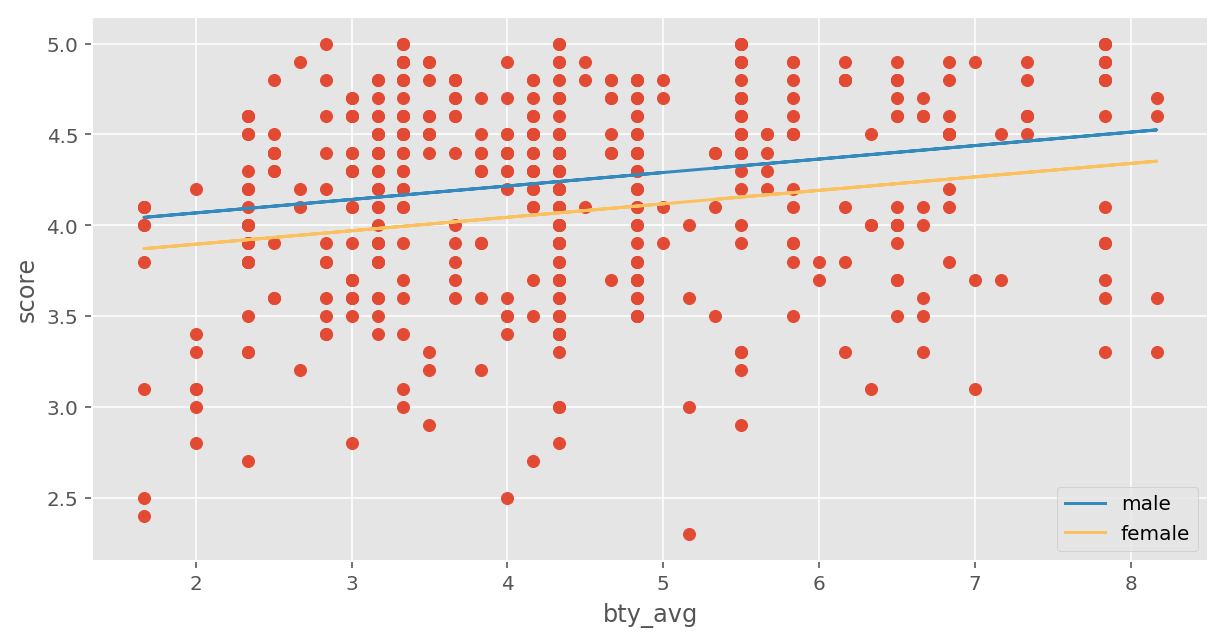

In [115]:
plt.scatter(evals.bty_avg, evals.score, label = '')
plt.xlabel('bty_avg')
plt.ylabel('score')

# male
y_male = 3.74733824 + 0.07415537*evals.bty_avg + 0.17238955*1
plt.plot(evals.bty_avg, y_male, color = 'C8', label = 'male')

# female
y_female = 3.74733824 + 0.07415537*evals.bty_avg + 0.17238955*0
plt.plot(evals.bty_avg, y_female, color = 'C4', label = 'female')

plt.legend(loc = 'lower right')
plt.show();

<div class = 'exercise'>
<h4>Exercise 9</h4>
    What is the equation of the line corresponding to males? (<i>Hint</i>: For males, the parameter estimate is multiplied by 1.) For two professors who received the same beauty rating, which gender tends to have the higher course evaluation score?
</div>

In [116]:
# equation for male
y_male = 3.74733824 + 0.07415537*evals.bty_avg + 0.17238955*1

Considering that, for males, the parameter estimate is multiplied by 1 (and female by 0) then for two professors who received the same beauty rating, male would have the higher course evaluation score.

<div class = 'exercise'>
<h4>Exercise 10</h4>
    Create a new model called <code>m_bty_rank</code> with <code>gender</code>  removed and <code>rank</code>  added in. Note that the rank variable has three levels:  <code>teaching</code> , <code>tenure track</code> , <code>tenured</code> .
</div>

Considering rank has 3 levels, I will first create the dummy variables to fit the model.

In [123]:
level_mapping = {'teaching': 0, 'tenure track': 1, 'tenured': 2}
rank_integer = evals['rank'].copy()
rank_integer = rank_integer.replace(level_mapping)
rank_integer.head(5)
evals['rank_integer'] = rank_integer

In [125]:
x = evals[['bty_avg','rank_integer']].copy()
y = np.array(evals.score).reshape((-1, 1))

In [126]:
# model initialization
mlinear_model = LinearRegression()
# fit the data
mlinear_model.fit(x, y)
# predict
y_pred = mlinear_model.predict(x)
print('Slope:', mlinear_model.coef_)
print('Intercept:', mlinear_model.intercept_)
print('R-squared:', r2_score(y, y_pred))

Slope: [[ 0.0635154  -0.05277007]]
Intercept: [3.96410906]
R-squared: 0.041175917567554565


In [127]:
reg = smf.ols('score ~ bty_avg + rank_integer', data=evals).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     9.877
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           6.31e-05
Time:                        22:11:48   Log-Likelihood:                -364.74
No. Observations:                 463   AIC:                             735.5
Df Residuals:                     460   BIC:                             747.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.9641      0.090     43.909      0.000       3.787       4.142
bty_avg          0.0635      0.016      3.883      0.000       0.031       0.096
rank_integer    -0.0528      0.031     -1.718      0.086      -0.113       0.008
==============================================================================
Omnibus:                       33.007   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.824
Skew:                          -0.709   Prob(JB):                     3.71e-09
Kurtosis:                       2.994   Cond. No.                         18.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The interpretation of the coefficients in multiple regression is slightly different from that of simple regression. The estimate for `bty_avg` reflects how much higher a group of professors is expected to score if they have a beauty rating that is one point higher *while holding all other variables constant*. In this case, that translates into considering only professors of the same rank with `bty_avg` scores that are one point apart.

## The search for the best model

We will start with a full model that predicts professor score based on rank, ethnicity, gender, language of the university where they got their degree, age, proportion of students that filled out evaluations, class size, course level, number of professors, number of credits, average beauty rating, outfit, and picture color.

<div class = 'exercise'>
<h4>Exercise 11</h4>
    Which variable would you expect to have the highest p-value in this model? Why? <i>Hint</i>: Think about which variable would you expect to not have any association with the professor score.
</div>

I would expect the number of credits (cls_credits) would not have an association with the professor score.

Let's run the model via `statsmodels`...

In [138]:
import statsmodels.api as sm

m_full = sm.formula.ols(formula = 'score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_profs + cls_credits + bty_avg + pic_outfit + pic_color', data = evals)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     7.366
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           6.55e-14
Time:                        22:41:13   Log-Likelihood:                -326.52
No. Observations:                 463   AIC:                             683.0
Df Residuals:                     448   BIC:                             745.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

<div class = 'exercise'>
<h4>Exercise 12</h4>
Check your suspicions from the previous exercise. Include the model output in your response.
    </div>

According to the model output from the previous exercise it seems that cls_profs is the variable that has the least association to the response variable score.

<div class = 'exercise'>
<h4>Exercise 13</h4>
Interpret the coefficient associated with the ethnicity variable.    </div>

If all other variables remain constant, then ethnicity increases the score by 0.1235.

<div class = 'exercise'>
<h4>Exercise 14</h4>
Drop the variable with the highest p-value and re-fit the model. Did the coefficients and significance of the other explanatory variables change? (One of the things that makes multiple regression interesting is that coefficient estimates depend on the other variables that are included in the model.) If not, what does this say about whether or not the dropped variable was collinear with the other explanatory variables?    </div>

In [139]:
# droping cls_profs and re-fitting the model
m_full = sm.formula.ols(formula = 'score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_level + cls_credits + bty_avg + pic_outfit + pic_color', data = evals)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     7.943
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           2.34e-14
Time:                        22:41:20   Log-Likelihood:                -326.56
No. Observations:                 463   AIC:                             681.1
Df Residuals:                     449   BIC:                             739.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Now, after droping the variable with the least association, the majority of coeficients are a little smaller, hence better as predictors now than before.

<div class = 'exercise'>
<h4>Exercise 15</h4>
Using backward-selection and p-value as the selection criterion, determine the best model. You do not need to show all steps in your answer, just the output for the final model. Also, write out the linear model for predicting score based on the final model you settle on.    </div>

Droping cls_level (p-value = 0.292) and re-fitting the model

In [145]:
m_full = sm.formula.ols(formula = 'score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_students + cls_credits + bty_avg + pic_outfit + pic_color', data = evals)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     8.510
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           1.27e-14
Time:                        22:46:20   Log-Likelihood:                -327.13
No. Observations:                 463   AIC:                             680.3
Df Residuals:                     450   BIC:                             734.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Droping cls_students (p-value = 0.319) and re-fitting the model

In [146]:
m_full = sm.formula.ols(formula = 'score ~ rank + ethnicity + gender + language + age + cls_perc_eval + cls_credits + bty_avg + pic_outfit + pic_color', data = evals)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     9.193
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           6.36e-15
Time:                        22:46:27   Log-Likelihood:                -327.64
No. Observations:                 463   AIC:                             679.3
Df Residuals:                     451   BIC:                             728.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Droping rank (p-value = 0.205) and re-fitting the model

In [147]:
m_full = sm.formula.ols(formula = 'score ~ ethnicity + gender + language + age + cls_perc_eval + cls_credits + bty_avg + pic_outfit + pic_color', data = evals)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     10.85
Date:                Sun, 22 Mar 2020   Prob (F-statistic):           2.44e-15
Time:                        22:46:33   Log-Likelihood:                -329.27
No. Observations:                 463   AIC:                             678.5
Df Residuals:                     453   BIC:                             719.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Droping pic_outfit (p-value = 0.091) and re-fitting the model

In [23]:
m_full = sm.formula.ols(formula = 'score ~ ethnicity + gender + language + age + cls_perc_eval + cls_credits + bty_avg + pic_color', data = evals)
multi_reg = m_full.fit()
print(multi_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     11.80
Date:                Sat, 04 Apr 2020   Prob (F-statistic):           2.58e-15
Time:                        14:19:13   Log-Likelihood:                -330.74
No. Observations:                 463   AIC:                             679.5
Df Residuals:                     454   BIC:                             716.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

Current model has all p-value lower than 0.05, so this would be the final model using p-value as the  selection criteria. Re writing with remaining coefficients: <br>
__score__ = 3.7719 + 0.1679(ethnicity) + 0.2071(gender) - 0.2062(language) + 0.5053(cls_credits)  -0.1906(pic_color) - 0.0060(age) + 0.00467(cls_perc_eval) + .50511(bty_avg)

<div class = 'exercise'>
<h4>Exercise 16</h4>
Verify that the conditions for this model are reasonable using diagnostic plots.    </div>

<div class = 'exercise'>
<h4>Exercise 17</h4>
The original paper describes how these data were gathered by taking a sample of professors from the University of Texas at Austin and including all courses that they have taught. Considering that each row represents a course, could this new information have an impact on any of the conditions of linear regression?    </div>

It could impact independence, since a student could evaluate differently a course that was instructed by the same professor.

<div class = 'exercise'>
<h4>Exercise 18</h4>
Based on your final model, describe the characteristics of a professor and course at University of Texas at Austin that would be associated with a high evaluation score.    </div>

We would evaluate the characteristics that corresponds to positive coeficients which are: ethnicity, gender, cls_credits, cls_perc_eval and bty_avg. <br>.
So the professor that is not minority, male, teaches a course of just one credit, high percentage of their students completed the evaluation and have a high beauty average.

<div class = 'exercise'>
<h4>Exercise 19</h4>
Would you be comfortable generalizing your conclusions to apply to professors generally (at any university)? Why or why not?</div>

No, i would not feel comfortable, since the sample is only from one university (Austin), and students from other university might provide different evaluation scores to their professor and also consider other potential variables that do not apply for Austin.

<div class = "license">
This lab was adapted by Vural Aksakalli and Imran Ture from OpenIntro by Andrew Bray and Mine Çetinkaya-Rundel.
</div>

***
www.featureranking.com